<a href="https://colab.research.google.com/github/BRIJNANDA1979/BIGEARTHNET/blob/main/Brij_CityBikesNYC_nov2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Trip Duration (seconds) — How long a trip lasted
2. Start Time and Date - Self explanatory
3. Stop Time and Date - Self explanatory
4. Start Station Name - Self explanatory
5. End Station Name - Self explanatory
6. Station ID - Unique identifier for each station
7. Station Lat/Long - Coordinates
8. Bike ID - unique identifier for each bike
9. User Type (Customer = 24-hour pass or 3-day pass user;  Subscriber = Annual Member) - Customers are usually tourists, subscribers are usually NYC residents
10. Gender (Zero=unknown; 1=male; 2=female) - Usually unknown for customers since they often sign up at a kiosk
11. Year of Birth - Self entered, not validated by an ID.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
source = '/content/drive/MyDrive/2023 BRIJ ML/bikes_NYC.csv'

In [ ]:
df = pd.read_csv(source)

In [ ]:
df.describe

<bound method NDFrame.describe of       tripduration       starttime        stoptime  start station id  \
0              496  4/01/2016 0:00  4/01/2016 0:08               254   
1              104  4/01/2016 0:00  4/01/2016 0:02               311   
2              128  4/01/2016 0:00  4/01/2016 0:02              3064   
3             1197  4/01/2016 0:00  4/01/2016 0:20              3156   
4              419  4/01/2016 0:00  4/01/2016 0:07               116   
...            ...             ...             ...               ...   
6162           243  4/01/2016 9:09  4/01/2016 9:13              3052   
6163          1002  4/01/2016 9:09  4/01/2016 9:25               445   
6164           492  4/01/2016 9:09  4/01/2016 9:17               489   
6165           586  4/01/2016 9:09  4/01/2016 9:18              3160   
6166           454  4/01/2016 9:09  4/01/2016 9:16               508   

               start station name  start station latitude  \
0                 W 11 St & 6 Ave       

In [ ]:
df.shape


(6167, 15)

In [ ]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [ ]:
df['gender']

0       1
1       1
2       1
3       1
4       2
       ..
6162    1
6163    2
6164    2
6165    1
6166    1
Name: gender, Length: 6167, dtype: int64

In [ ]:
  df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
listofcolumns = df.columns.values.tolist()

print(listofcolumns)

In [ ]:
print(listofcolumns[0])

tripduration


In [ ]:
df[0:2]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,496,4/01/2016 0:00,4/01/2016 0:08,254,W 11 St & 6 Ave,40.735324,-73.998004,236,St Marks Pl & 2 Ave,40.728419,-73.98714,19704,Subscriber,1984.0,1
1,104,4/01/2016 0:00,4/01/2016 0:02,311,Norfolk St & Broome St,40.717227,-73.988021,350,Clinton St & Grand St,40.715595,-73.98703,21555,Subscriber,1970.0,1


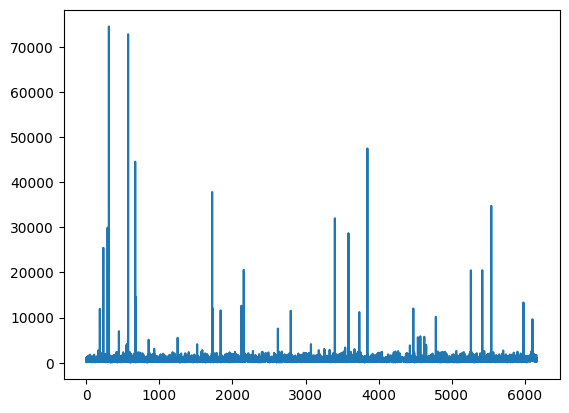

In [ ]:
# tripduration is in seconds

import matplotlib
import matplotlib.pyplot as plt
matplotlib.pyplot.plot(df['tripduration'])

In [ ]:
df.groupby(['gender'])['tripduration'].max()         # to find number of different sex riders

gender
0    74484
1    37824
2    34748
Name: tripduration, dtype: int64

In [ ]:
df.groupby(['birth year'])['tripduration'].max()    # age wise

birth year
1885.0     637
1899.0    1367
1926.0     572
1938.0     649
1939.0     386
          ... 
1996.0     737
1997.0    2192
1998.0    1723
1999.0    1629
2000.0     397
Name: tripduration, Length: 65, dtype: int64

In [ ]:
print(df.groupby(['birth year']))
grouped  = df.groupby(['birth year'])
grouped.first()    # Let's print the first entries       in all the groups formed.

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,gender
birth year,,,,,,,,,,,,,,
1885.0,637,4/01/2016 7:38,4/01/2016 7:49,455,1 Ave & E 44 St,40.750020,-73.969053,493,W 45 St & 6 Ave,40.756800,-73.982912,15439,Subscriber,0
1899.0,1367,4/01/2016 7:40,4/01/2016 8:03,3236,W 42 St & Dyer Ave,40.758985,-73.993800,376,John St & William St,40.708621,-74.007222,17669,Subscriber,1
1926.0,572,4/01/2016 3:15,4/01/2016 3:25,529,W 42 St & 8 Ave,40.757570,-73.990985,509,9 Ave & W 22 St,40.745497,-74.001971,17891,Subscriber,2
1938.0,214,4/01/2016 6:10,4/01/2016 6:13,238,Bank St & Washington St,40.736197,-74.008592,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17912,Subscriber,1
1939.0,386,4/01/2016 6:44,4/01/2016 6:50,3150,E 85 St & York Ave,40.775369,-73.948034,3156,E 72 St & York Ave,40.766638,-73.953483,18267,Subscriber,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996.0,388,4/01/2016 0:00,4/01/2016 0:07,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,326,E 11 St & 1 Ave,40.729538,-73.984267,19581,Subscriber,1
1997.0,207,4/01/2016 0:16,4/01/2016 0:19,3244,University Pl & E 8 St,40.731437,-73.994903,483,E 12 St & 3 Ave,40.732233,-73.988900,21713,Subscriber,1
1998.0,366,4/01/2016 1:19,4/01/2016 1:26,3177,W 84 St & Broadway,40.786795,-73.977112,3166,Riverside Dr & W 72 St,40.780578,-73.985624,19677,Subscriber,1


In [ ]:
df['birth year'].agg(np.max)


2000.0

In [ ]:
df['birth year'].agg(np.min)

1885.0

In [ ]:
# find most visited station
d = df.groupby(['end station id']).size()                # size() returns number of rows in each group that is number of riders ended at same station
d.dtypes
print(d)


end station id
72      12
79      15
82       4
83       3
116     36
        ..
3236     1
3238     2
3242     1
3244    15
3246     2
Length: 435, dtype: int64


In [ ]:
result = d.idxmax()        #Pandas Series.idxmax() function return the row label of the maximum value.
print('Most frequently visited end station is with ID  : ' + str(result))


Most frequently visited end station is with ID  : 359


In [ ]:
# USER type analysis

df['usertype']

0       Subscriber
1       Subscriber
2       Subscriber
3       Subscriber
4       Subscriber
           ...    
6162    Subscriber
6163    Subscriber
6164    Subscriber
6165    Subscriber
6166    Subscriber
Name: usertype, Length: 6167, dtype: object

In [ ]:
grouped = df.groupby(['usertype'])

In [ ]:
tempseries = grouped.size()
tempseries

usertype
Customer       170
Subscriber    5997
dtype: int64

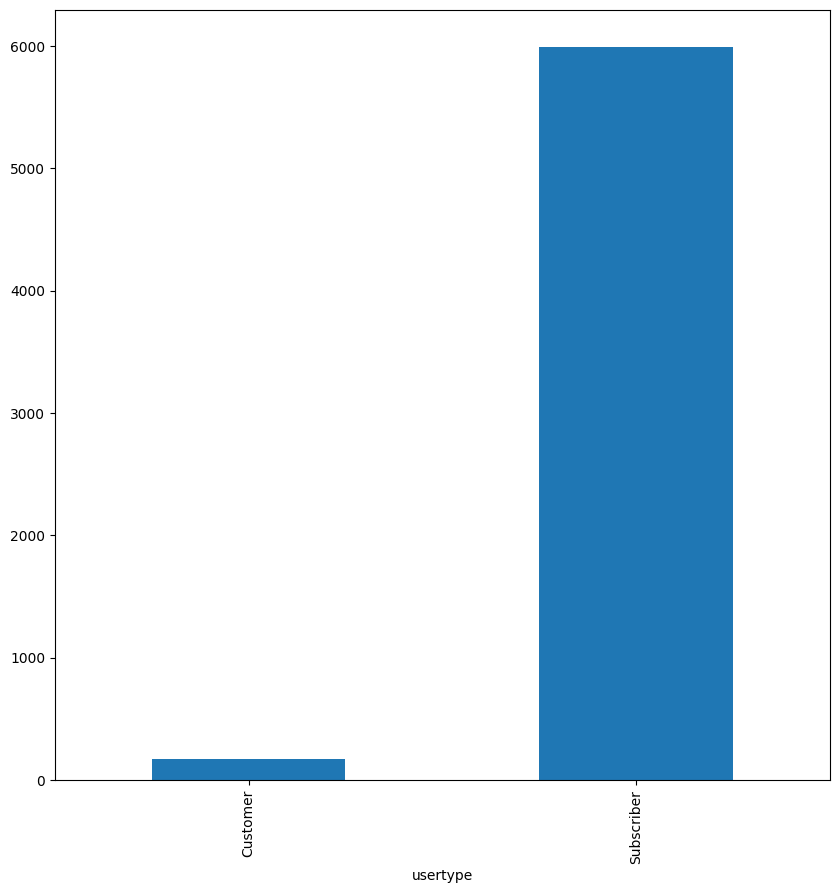

In [ ]:
tempseries.plot(kind="bar", figsize=(10,10))
plt.show()

In [ ]:
# Average tri[p duration by USER type

grouped = df.groupby(['usertype'])

list_temp1 = []
list_temp2 = []
for name,group in grouped:
  print(name)
  list_temp1.append(name)
  print(group['tripduration'].mean())
  list_temp2.append(group['tripduration'].mean())

Customer
2997.2705882352943
Subscriber
715.8455894613974


<ipython-input-95-5c031a346313>:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in grouped:


In [ ]:
list_temp1

['Customer', 'Subscriber']

In [ ]:
list_temp2

[2997.2705882352943, 715.8455894613974]

<BarContainer object of 2 artists>

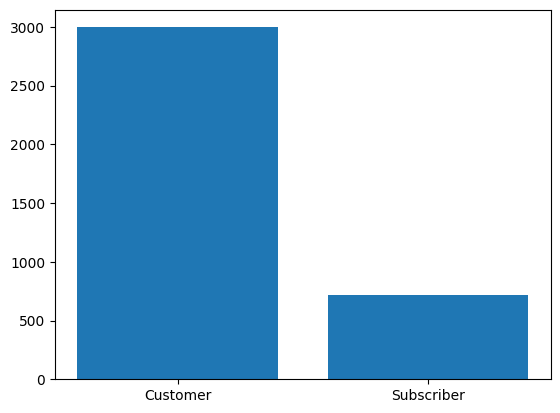

In [ ]:
plt.bar(list_temp1,list_temp2)

In [ ]:
#busiest bike in NYC in 2017

d = df.groupby(['bikeid']).size()

result = d.idxmax()        #Pandas Series.idxmax() function return the row label of the maximum value.
print('Most frequently vused bike ID  : ' + str(result))


Most frequently vused bike ID  : 17999


In [ ]:
tdf = pd.DataFrame(df, columns=['bikeid', 'tripduration'])
tdf.head()

,bikeid,tripduration
0,19704,496
1,21555,104
2,17430,128
3,17413,1197
4,16714,419


In [ ]:
grouped = tdf.groupby(['bikeid'])
l1=[]
l2=[]
for name,group in grouped:
 l1.append(name)
 l2.append(group['tripduration'].sum())


<ipython-input-101-31ed744a33d7>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in grouped:


In [ ]:
tdf = pd.DataFrame(list(zip(l1, l2)),
               columns =['BikeID', 'Totaltravel'])
tdf

,BikeID,Totaltravel
0,14529,44539
1,14530,968
2,14532,686
3,14533,364
4,14535,1420
...,...,...
2855,24731,4113
2856,24744,3359
2857,24753,1914
2858,24757,2029


In [ ]:
tt=tdf[tdf['Totaltravel'] == tdf['Totaltravel'].max()]

In [ ]:
tt

,BikeID,Totaltravel
1260,17807,75894


In [ ]:
tdf['Totaltravel'].max()

75894

In [ ]:
df = df.drop(df.index[(df['tripduration'] > 2700)])

In [ ]:
import shapefile as shp  #https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac

In [ ]:
sf = shp.Reader('/content/drive/MyDrive/2023 BRIJ ML/CityBikeData/geo_export_264421f4-7b95-440c-9d6d-2545323dcd90.shp')

In [ ]:
len(sf.shapes())

1082349

In [ ]:
pip install basemap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap           #https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
import geopandas as gpd
import pandas as pd

In [ ]:
fig = plt.figure(figsize=(8, 8))


<Figure size 800x800 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

In [ ]:
pip install basemap-data-hires

In [ ]:
m = Basemap(projection='lcc', resolution='h',
            lat_0=40.712784, lon_0=-74.005941,         #40.712784,-74.005941  for NYC usa
            width=10.05E6, height=12.2E6)

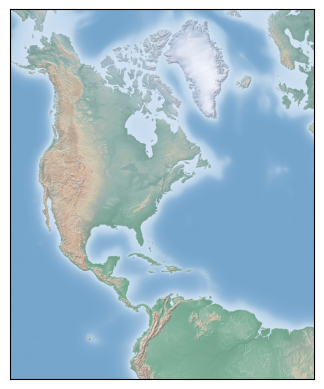

In [ ]:
m.shadedrelief()

<ipython-input-182-a0206731d97a>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  m.scatter(x, y, latlon=False,


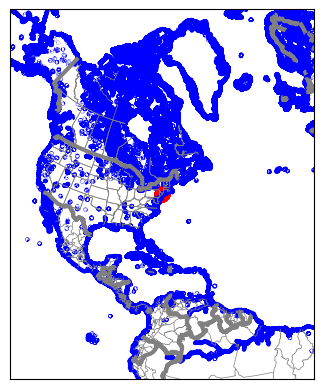

In [ ]:
m.drawcoastlines(color='blue',linewidth=3)
m.drawcountries(color='gray',linewidth=3)
m.drawstates(color='gray')
# scatter city data, with c reflecting population
lon = df['start station longitude'].values
lat = df['start station latitude'].values
x, y = m(lon, lat)  # transform coordinates
color=[]
size = []
for i in range(x.size):
  color.append(1)
  size.append(i)
m.scatter(x, y, latlon=False,
          c= 'r' ,
          cmap='jet', s=100, alpha=1)

#plt.show()